# Hands-on Day 1

## You'll learn

- familiarize with jupyter notebooks, numpy and pandas

### Input data
- efficient data format: convert CSV to Parquet

### Visualization
- explore dataset, plot features
- correlation matrix


# Dataset description

The dataset used in this example is described [here](https://archive.ics.uci.edu/ml/datasets/HIGGS). It is a binary classification problem where the goal is to train a classifier able to distinguish between a signal process, the production of new theoretical Higgs bosons, and a background process with identical decay products but distinct kinematic features.

Each row of this dataset contains 28 features plus the label:

- 21 low-level features which represent the basic measure made by the particle detector
  - Momentum of the observed paricles
  - Missing transverse momentum
  - Jets and b-tagging information
- 7 high-level features computed from the low-level features that encode the knowledge of the different intermediate states of the two processes (reconstructed invariant masses)

In [18]:
%reload_ext custom_functions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Check out these custom functions
from custom_functions import *

In [3]:
#define number of events - to pick input file

#evt = "100k" # use this for debugging
evt = "1M"

In [4]:
# read in csv input file
input_file = "/data-corso/Higgs"+evt+".csv"

# comma delimited is the default
%time df = pd.read_csv(input_file, header = 0)

CPU times: user 9 s, sys: 767 ms, total: 9.77 s
Wall time: 9.79 s


## Exercise 1

### Create parquet files, which are faster to read than CSV

- convert the df dataframe to parquet and save it in your home
- read it back in and time it. How much faster is reading from parquet than csv?

In [9]:
# convert to parquet
%time df.to_parquet("Higgs_"+evt+".parquet", engine="pyarrow", compression="snappy")

CPU times: user 1.42 s, sys: 232 ms, total: 1.65 s
Wall time: 1.6 s


In [10]:
# read in input parquet file
input_file = "Higgs_"+evt+".parquet"
%time df = pd.read_parquet(input_file)

CPU times: user 779 ms, sys: 1.17 s, total: 1.95 s
Wall time: 807 ms


# Now let's have a look at the input data

In [11]:
df

,label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1_pt,jet1_eta,jet1_phi,jet1_b-tag,...,je4_eta,jet4_phi,jet4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,0.0,1.289299,-1.108431,0.970869,0.418467,-0.236384,1.439424,1.415013,0.384343,0.000000,...,-0.196174,-0.649514,3.101961,3.715858,2.295703,0.990350,0.826123,0.602524,1.549889,1.489945
999995,1.0,0.514256,0.441154,0.641281,0.376795,0.840085,0.812464,-0.038644,-0.329241,0.000000,...,0.032852,1.471465,0.000000,0.813464,0.723074,0.984661,0.734838,0.226974,0.817835,0.750583
999996,1.0,1.586689,0.798600,-1.038389,0.186234,-1.465364,1.328488,0.356457,0.846692,2.173076,...,0.155277,-0.170067,3.101961,2.318721,1.348919,0.997061,1.345282,0.984395,1.167846,1.042671
999997,0.0,1.833751,0.194740,1.489664,0.453500,0.077691,1.112570,1.208055,0.155386,2.173076,...,0.112803,0.599699,0.000000,1.033291,0.878243,1.207249,0.980557,1.977671,1.186537,1.025073


In [12]:
# print column names
list(df.columns.values)

['label',
 'lepton_pT',
 'lepton_eta',
 'lepton_phi',
 'missing_energy_magnitude',
 'missing_energy_phi',
 'jet1_pt',
 'jet1_eta',
 'jet1_phi',
 'jet1_b-tag',
 'jet2_pt',
 'jet2_eta',
 'jet2_phi',
 'jet2_b-tag',
 'jet3_pt',
 'jet3_eta',
 'jet3_phi',
 'jet3_b-tag',
 'jet4_pt',
 'je4_eta',
 'jet4_phi',
 'jet4_b-tag',
 'm_jj',
 'm_jjj',
 'm_lv',
 'm_jlv',
 'm_bb',
 'm_wbb',
 'm_wwbb']

In [13]:
# The first column is the target variable
y = df.iloc[:, 0] #df with label
x = df.iloc[: , 1:] #df with all other variables

len(x)

999999

In [14]:
# labels
y

0         1.0
1         1.0
2         1.0
3         0.0
4         1.0
         ... 
999994    0.0
999995    1.0
999996    1.0
999997    0.0
999998    0.0
Name: label, Length: 999999, dtype: float64

In [15]:
# input features
x

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1_pt,jet1_eta,jet1_phi,jet1_b-tag,jet2_pt,...,je4_eta,jet4_phi,jet4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,1.374992,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,0.812581,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,0.851737,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,2.423265,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,0.800872,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,1.289299,-1.108431,0.970869,0.418467,-0.236384,1.439424,1.415013,0.384343,0.000000,1.972152,...,-0.196174,-0.649514,3.101961,3.715858,2.295703,0.990350,0.826123,0.602524,1.549889,1.489945
999995,0.514256,0.441154,0.641281,0.376795,0.840085,0.812464,-0.038644,-0.329241,0.000000,1.006598,...,0.032852,1.471465,0.000000,0.813464,0.723074,0.984661,0.734838,0.226974,0.817835,0.750583
999996,1.586689,0.798600,-1.038389,0.186234,-1.465364,1.328488,0.356457,0.846692,2.173076,0.721679,...,0.155277,-0.170067,3.101961,2.318721,1.348919,0.997061,1.345282,0.984395,1.167846,1.042671
999997,1.833751,0.194740,1.489664,0.453500,0.077691,1.112570,1.208055,0.155386,2.173076,1.398032,...,0.112803,0.599699,0.000000,1.033291,0.878243,1.207249,0.980557,1.977671,1.186537,1.025073


## Exercise 2

- Create a function that makes a plot of any of the features for signal versus background (using the y label variable to discriminate)
- see an example of the plot in the hands-on [slides](https://github.com/Course-bigDataAndML/MLCourse-2324/blob/main/Slides/Day1/Big%20data%20science%20-%20Hands-on%20-%20Day%201%20-%202324.pdf)
  
### Suggestions:

  - the function should take as input the selected column and the label column (y), i.e. plot(x(feature), y)
  - to develop the code, use the 100k dataset, so that debugging goes quicker

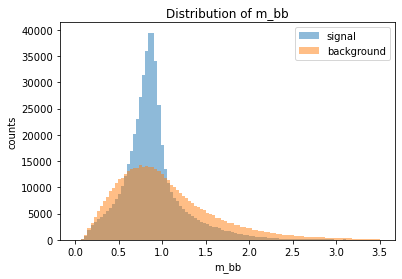

In [20]:
#plot invariant mass distribution 
variable = 'm_bb'
plotSignalvsBg2(x.loc[:, variable],y)

## Exercise 3

- plot the input variables and try to understand which ones show better separation power between signal and background
- make a list of the most promising ones

## Exercise 4

- Print (or draw) the correlation matrix (a table showing correlation coefficients between variables)

In [21]:
plotCorrelation(x)

TypeError: plotCorrelation() missing 1 required positional argument: 'feature'